In [1]:
# for dataset management
import pandas as pd

# for data visualization 
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

# Import and process the data

In [19]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [20]:
wine_df = pd.read_csv(url, sep=';')
wine_df = wine_df[wine_df['total sulfur dioxide']<200]

In [21]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Re-orgnize the data into train/test in Dataloaders

In [22]:
import sys
sys.path.append('../utils')
sys.path.append('../models')

In [23]:
from data_loaders import reorgnize_dataloaders

In [24]:
# create dataloaders    
train_loader, test_loader = reorgnize_dataloaders(train_batch_size=32, test_batch_size=32)

torch.Size([1597, 11])


In [25]:
# create class for the model with batch-normalization  
from wine_batchNorm import WineModel_BNorm

# Train the model

In [26]:
from training import trainTheM0del

In [27]:
num_epochs = 1000

# The experiment

In [28]:
# train the model without batch normalization
model = WineModel_BNorm()
lossesNo, train_accuracyNo, test_accuracyNo = trainTheM0del(
    doBN=False,
    model=WineModel_BNorm(),
    train_loader=train_loader,
    test_loader=test_loader,
    num_epochs=num_epochs)

In [29]:
# train the model with batch normalization
lossesYes, train_accuracyYes, test_accuracyYes = trainTheM0del(
    doBN=True,
    model=WineModel_BNorm(),
    train_loader=train_loader,
    test_loader=test_loader,
    num_epochs=num_epochs)

In [33]:
metrics = ['loss','train acc','test acc']

classes = [
    {
        'name':'No batch norm',
        'loss':lossesNo,
        'train acc':train_accuracyNo,
        'test acc':test_accuracyNo

    },
    {
        'name':'With batch norm',
        'loss':lossesYes,
        'train acc':train_accuracyYes,
        'test acc':test_accuracyYes
    }

]

In [34]:
from performance_plots import comparison_plot

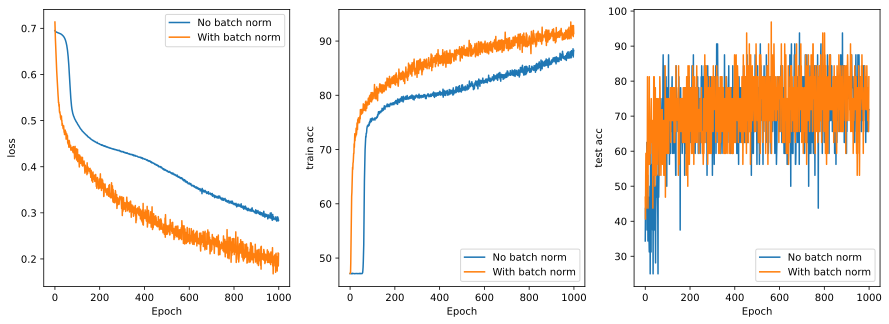

In [35]:
comparison_plot(metrics,classes)